In [11]:
import xlrd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import OrderedDict
import itertools
from wordcloud import WordCloud

In [3]:
moviedf = pd.read_csv('data/MoviesOnStreamingPlatforms_updated.csv', converters = {'Timestamp':str})
imdbdf = pd.read_csv('data/IMDB-Movie-Data.csv', converters = {'Timestamp':str})

In [4]:
dictyr = {}
for i in range(len(moviedf.index)):
    try:
        dictyr[moviedf.iloc[i]['Year']].append(moviedf.iloc[i]['Title'])
    except:
        dictyr[moviedf.iloc[i]['Year']] = []
        dictyr[moviedf.iloc[i]['Year']].append(moviedf.iloc[i]['Title'])
dictyrnum = {}
for keys,values in dictyr.items():
    dictyrnum[keys] = len(values)
ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
minyr = list(ordereddictyrnum.keys())[0]
print(minyr)

1902


In [5]:
def plot_yr_pie(df,platform):
    '''
    Pie charts for year wise distribution of movies on platforms
    input param: df: input dataframe
    input param: platform: one of the platform
    '''
    moviedf = df
    dictyr = {}
    for i in range(len(moviedf.index)):
        if moviedf.iloc[i][platform] == 1:
            try:
                dictyr[moviedf.iloc[i]['Year']].append(moviedf.iloc[i]['Title'])
            except:
                dictyr[moviedf.iloc[i]['Year']] = []
                dictyr[moviedf.iloc[i]['Year']].append(moviedf.iloc[i]['Title'])
    dictyrnum = {}
    for keys,values in dictyr.items():
        dictyrnum[keys] = len(values)
    ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
    minyrn = list(ordereddictyrnum.keys())[0]
    z =  (minyrn - 1900)//10
    cnt = 1900 + z*10
    cntfil = 0
    dictyrchunksnum = {}
    for keys in ordereddictyrnum.keys():
        try:
            cntfil = (keys-cnt)//10
            dictyrchunksnum[cntfil] = dictyrchunksnum[cntfil] + ordereddictyrnum[keys]
        except:
            cntfil = (keys-cnt)//10
            dictyrchunksnum[cntfil] = 0
            dictyrchunksnum[cntfil] = dictyrchunksnum[cntfil] + ordereddictyrnum[keys]
    i = 1900 + z*10
    newdictyrchunksnum = {}
    for keys,values in dictyrchunksnum.items():
        newdictyrchunksnum[str(i)+'-'+str(i+9)] = values
        i = i+10
    labels = []
    data = []
    for keys,values in newdictyrchunksnum.items():
        labels.append(keys)
        data.append(values)
    plt.pie(data, labels=labels)
    plt.axis('equal')
    plt.show()

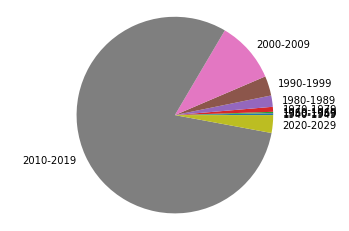

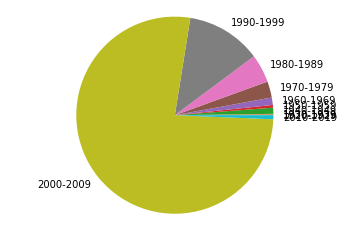

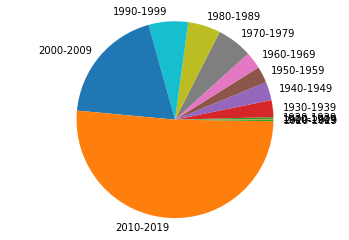

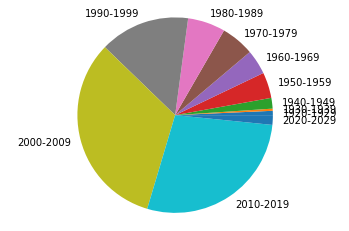

In [6]:
plot_yr_pie(moviedf,'Netflix')
plot_yr_pie(moviedf,'Hulu')
plot_yr_pie(moviedf,'Prime Video')
plot_yr_pie(moviedf,'Disney+')

In [7]:
def director_scatter(df,platform):
    '''
    Scatter chart for directors distribution of movies on platforms
    input param: df: input dataframe
    input param: platform: one of the platform
    '''
    moviedf = df
    dictyr = {}
    directors = ''
    moviedf = moviedf.dropna()
    for i in range(len(moviedf.index)):
        listdirectors = []
        if moviedf.iloc[i][platform] == 1:
            directors = moviedf.iloc[i]['Directors']
            listdirectors = directors.split(',')
            for currdir in listdirectors:
                try:
                    dictyr[currdir].append(moviedf.iloc[i]['Title'])
                except:
                    dictyr[currdir] = []
                    dictyr[currdir].append(moviedf.iloc[i]['Title'])
    dictyrnum = {}
    for keys,values in dictyr.items():
        dictyrnum[keys] = len(values)
    ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
    labels = []
    data = []
    labelscnt = []
    for keys,values in ordereddictyrnum.items():
        labels.append(keys)
        data.append(values)
    for i in range(len(labels)):
        labelscnt.append(labels.index(labels[i]))
    plt.scatter(labelscnt,data)
    fig = plt.gcf()
    fig.set_size_inches(20,20)
    for i, txt in enumerate(labels):
        plt.annotate(txt, (labelscnt[i],data[i]))
    plt.show()

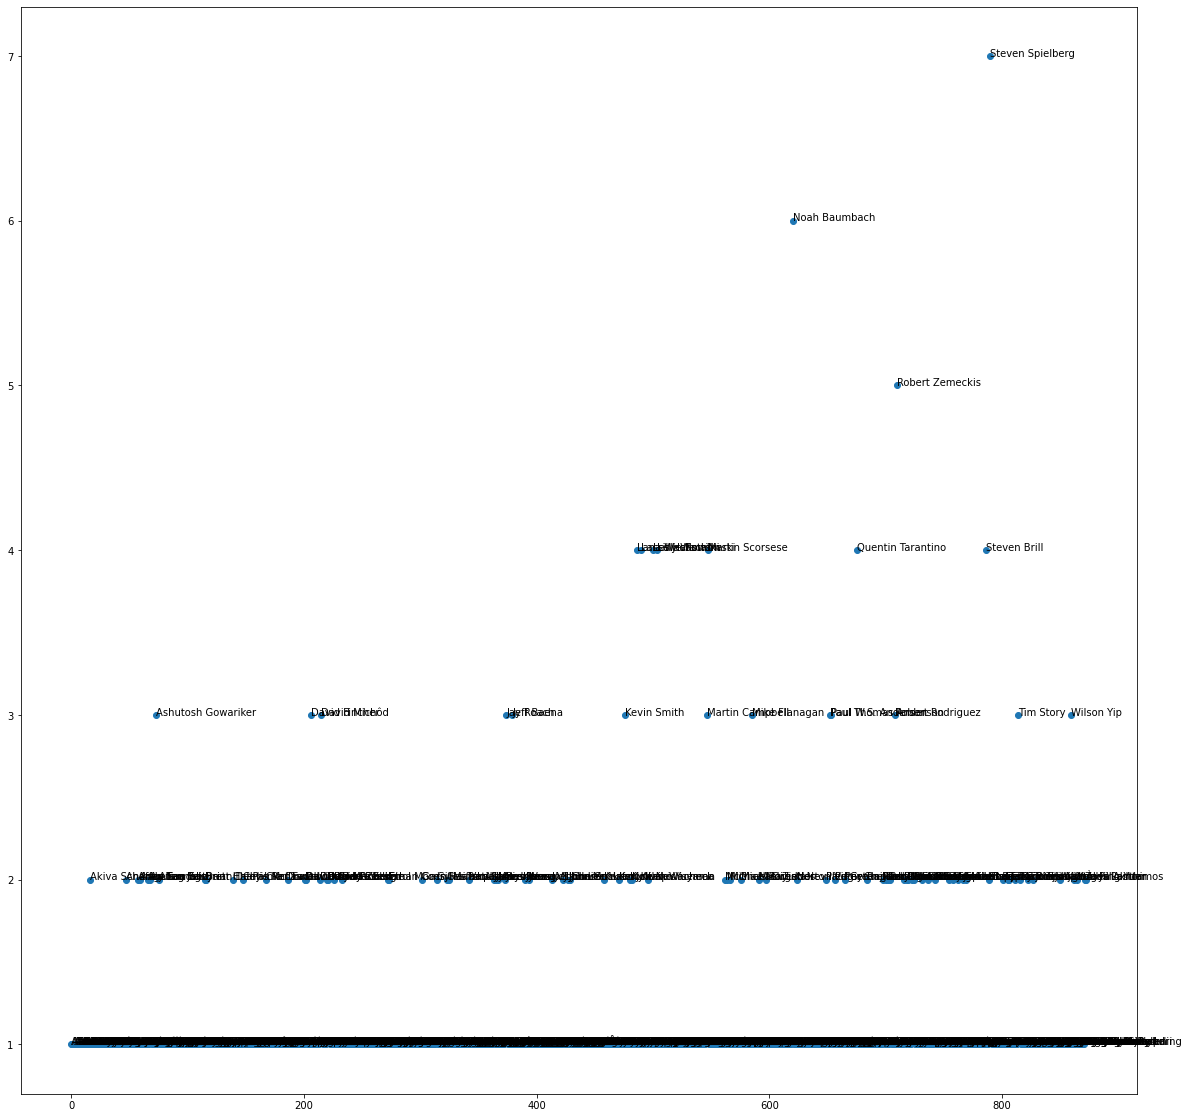

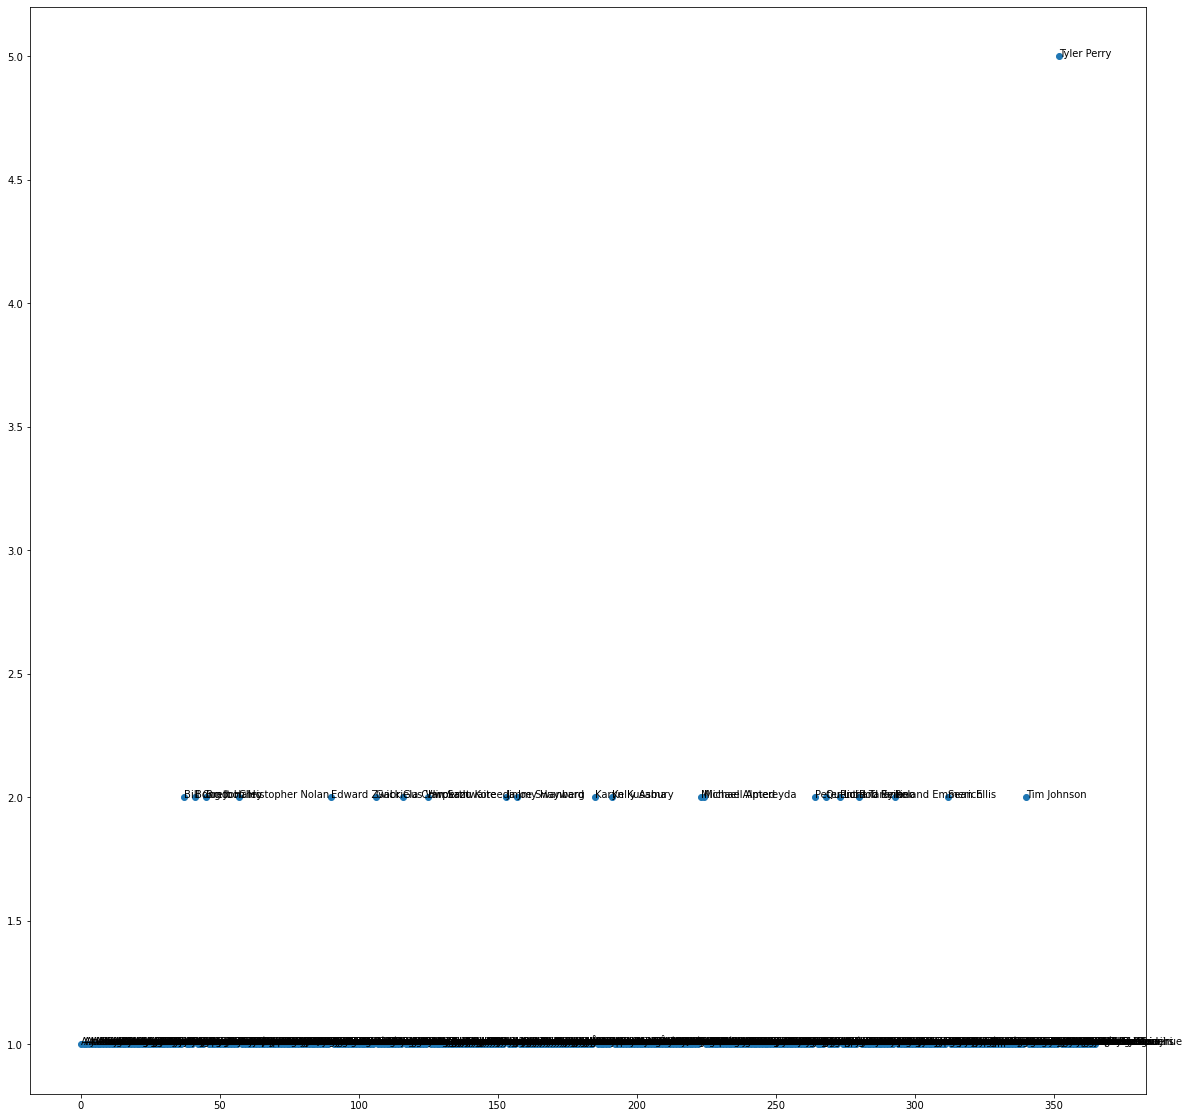

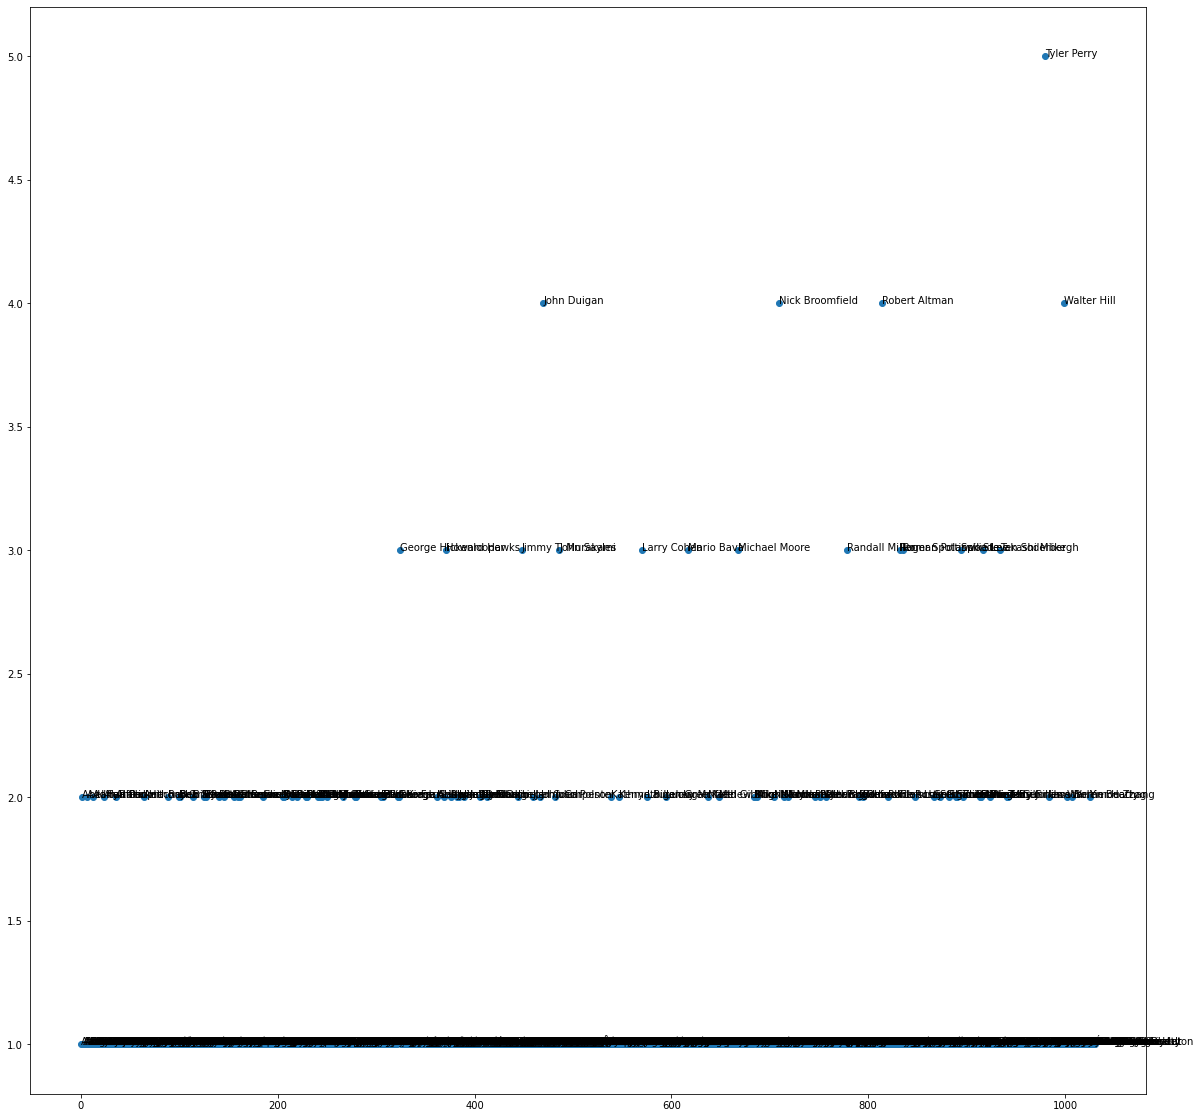

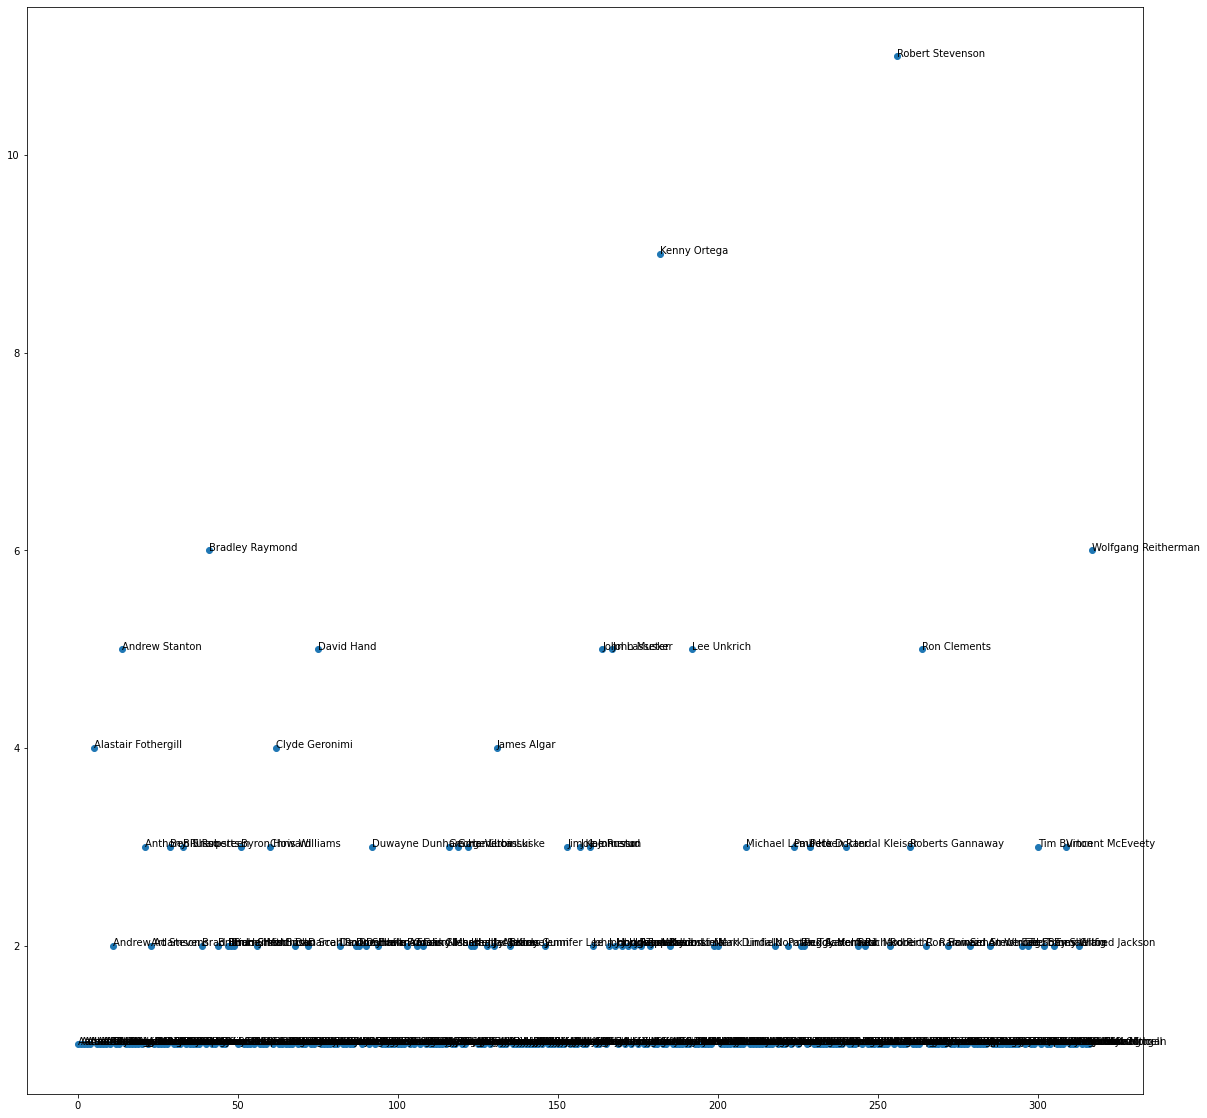

In [8]:
director_scatter(moviedf,'Netflix')
director_scatter(moviedf,'Hulu')
director_scatter(moviedf,'Prime Video')
director_scatter(moviedf,'Disney+')

In [9]:
def create_wordcloud_director(df,platform):
    '''
    Wordcloud for director distribution of movies on platforms
    input param: df: input dataframe
    input param: platform: one of the platform
    '''
    moviedf = df
    dictyr = {}
    directors = ''
    moviedf = moviedf.dropna()
    for i in range(len(moviedf.index)):
        listdirectors = []
        if moviedf.iloc[i][platform] == 1:
            directors = moviedf.iloc[i]['Directors']
            listdirectors = directors.split(',')
            for currdir in listdirectors:
                try:
                    dictyr[currdir].append(moviedf.iloc[i]['Title'])
                except:
                    dictyr[currdir] = []
                    dictyr[currdir].append(moviedf.iloc[i]['Title'])
    dictyrnum = {}
    for keys,values in dictyr.items():
        dictyrnum[keys] = len(values)
    ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
    labels = []
    data = []
    labelscnt = []
    for keys,values in ordereddictyrnum.items():
        labels.append(keys)
        data.append(values)
    for i in range(len(labels)):
        labelscnt.append(labels.index(labels[i]))
    d = dict(zip(labels, data))
    wordcloud = WordCloud(collocations=False).generate_from_frequencies(d)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("wordc1"+".png", bbox_inches='tight')
    plt.show()
    plt.close()


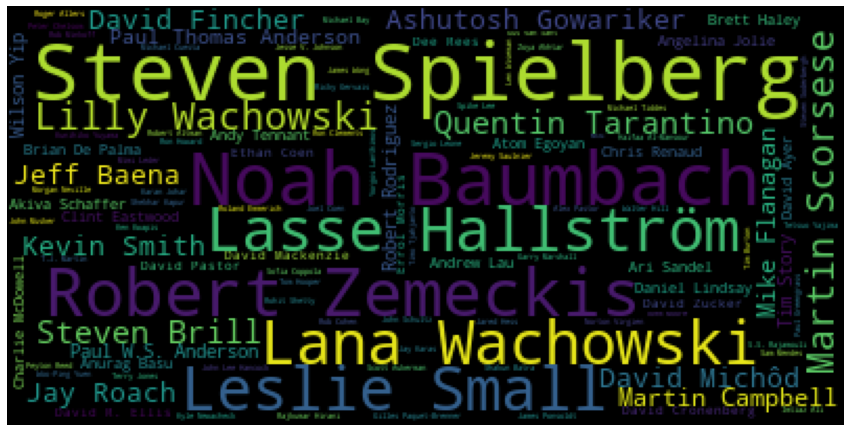

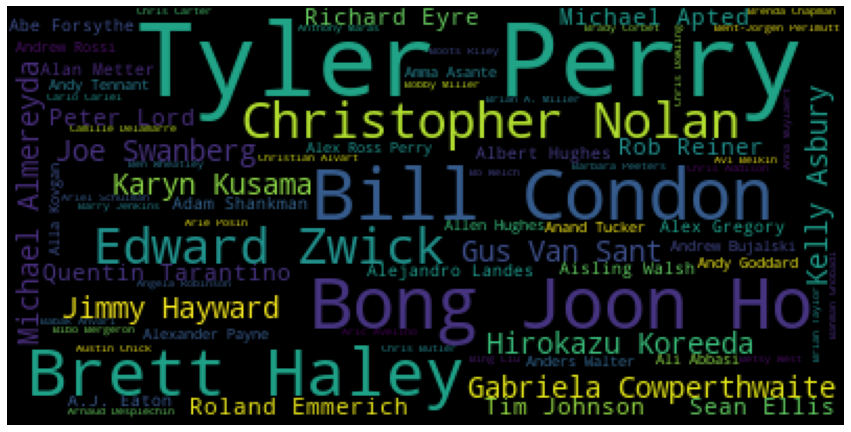

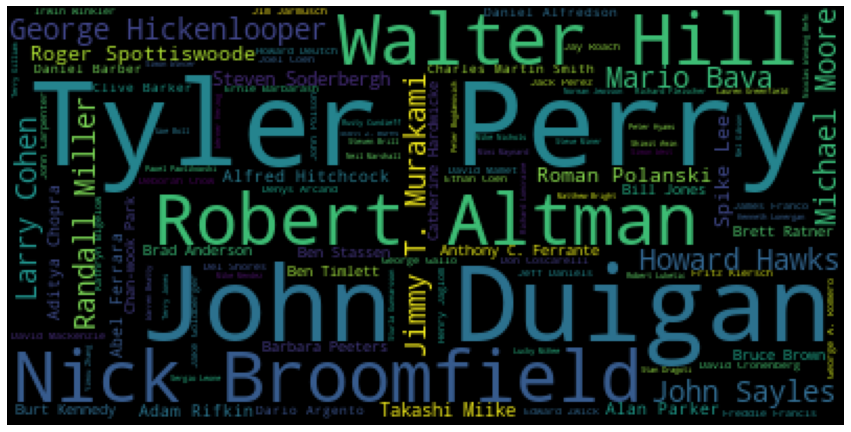

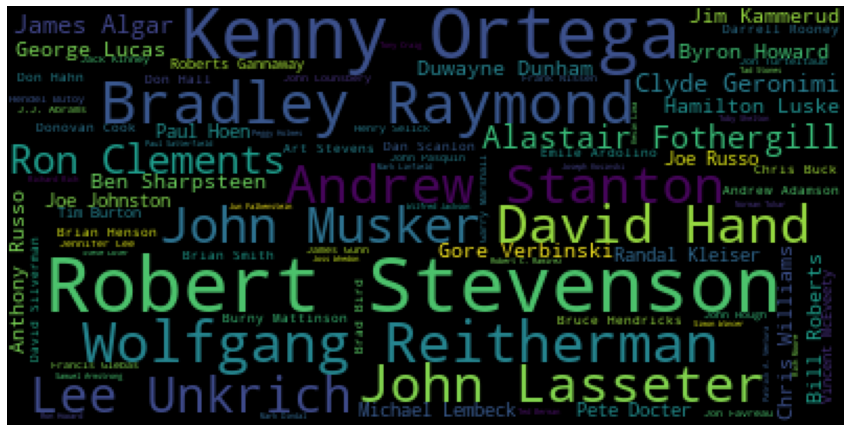

In [13]:
create_wordcloud_director(moviedf,'Netflix')
create_wordcloud_director(moviedf,'Hulu')
create_wordcloud_director(moviedf,'Prime Video')
create_wordcloud_director(moviedf,'Disney+')

In [14]:
def country_pie(df,platform):
  '''
  pie chart for country wise distribution of movies on platforms
  input param: df: input dataframe
  input param: platform: one of the platform
  '''
  moviedf = df
  dictyr = {}
  directors = ''
  moviedf = moviedf.dropna()
  for i in range(len(moviedf.index)):
      listdirectors = []
      if moviedf.iloc[i][platform] == 1:
          directors = moviedf.iloc[i]['Country']
          listdirectors = directors.split(',')
          for currdir in listdirectors:
              try:
                  dictyr[currdir].append(moviedf.iloc[i]['Title'])
              except:
                  dictyr[currdir] = []
                  dictyr[currdir].append(moviedf.iloc[i]['Title'])
  dictyrnum = {}
  for keys,values in dictyr.items():
      dictyrnum[keys] = len(values)
  ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
  labels = []
  data = []
  labelscnt = []
  for keys,values in ordereddictyrnum.items():
      labels.append(keys)
      data.append(values)
  plt.pie(data, labels = labels)
  plt.axis('equal')
  plt.show()

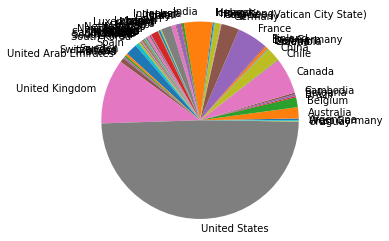

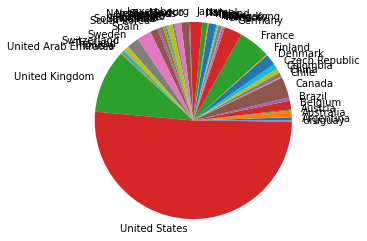

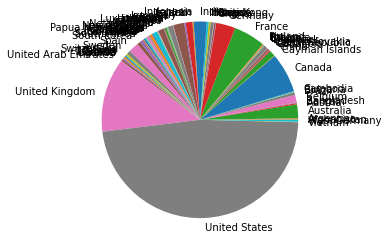

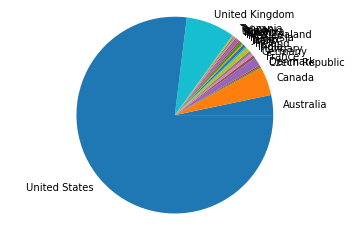

In [15]:
country_pie(moviedf,'Netflix')
country_pie(moviedf,'Hulu')
country_pie(moviedf,'Prime Video')
country_pie(moviedf,'Disney+')

In [16]:
def language_pie(df,platform):
  '''
  pie chart for language wise distribution of movies on platforms
  input param: df: input dataframe
  input param: platform: one of the platform
  '''
  moviedf = df
  dictyr = {}
  directors = ''
  moviedf = moviedf.dropna()
  for i in range(len(moviedf.index)):
      listdirectors = []
      if moviedf.iloc[i][platform] == 1:
          directors = moviedf.iloc[i]['Language']
          listdirectors = directors.split(',')
          for currdir in listdirectors:
              try:
                  dictyr[currdir].append(moviedf.iloc[i]['Title'])
              except:
                  dictyr[currdir] = []
                  dictyr[currdir].append(moviedf.iloc[i]['Title'])
  dictyrnum = {}
  for keys,values in dictyr.items():
      dictyrnum[keys] = len(values)
  ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
  labels = []
  data = []
  labelscnt = []
  for keys,values in ordereddictyrnum.items():
      labels.append(keys)
      data.append(values)
  plt.pie(data, labels = labels)
  plt.axis('equal')
  plt.show()

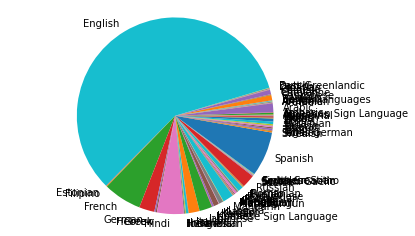

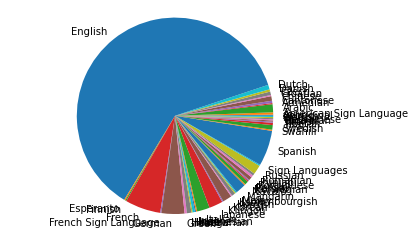

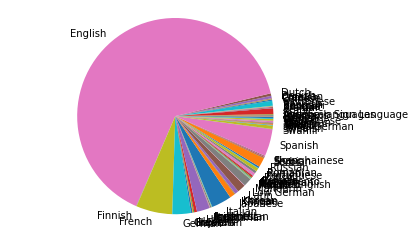

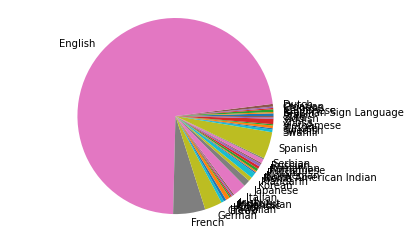

In [17]:
language_pie(moviedf,'Netflix')
language_pie(moviedf,'Hulu')
language_pie(moviedf,'Prime Video')
language_pie(moviedf,'Disney+')

In [18]:
def runtime_pie(df,platform):
  '''
  pie chart for runtime wise distribution of movies on platforms
  input param: df: input dataframe
  input param: platform: one of the platform
  '''
  dictyr = {}
  moviedf = df
  moviedf = moviedf.dropna()
  for i in range(len(moviedf.index)):
      if moviedf.iloc[i][platform] == 1:
          try:
              dictyr[moviedf.iloc[i]['Runtime']].append(moviedf.iloc[i]['Title'])
          except:
              dictyr[moviedf.iloc[i]['Runtime']] = []
              dictyr[moviedf.iloc[i]['Runtime']].append(moviedf.iloc[i]['Title'])
  dictyrnum = {}
  for keys,values in dictyr.items():
      dictyrnum[keys] = len(values)
  ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
  minyrn = list(ordereddictyrnum.keys())[0]
  z =  (minyrn - 10)//10
  cnt = 10 + z
  cntfil = 0
  dictyrchunksnum = {}
  for keys in ordereddictyrnum.keys():
      try:
          cntfil = (keys-cnt)//10
          dictyrchunksnum[cntfil] = dictyrchunksnum[cntfil] + ordereddictyrnum[keys]
      except:
          cntfil = (keys-cnt)//10
          dictyrchunksnum[cntfil] = 0
          dictyrchunksnum[cntfil] = dictyrchunksnum[cntfil] + ordereddictyrnum[keys]
  i = 10 + z
  newdictyrchunksnum = {}
  for keys,values in dictyrchunksnum.items():
      newdictyrchunksnum[str(i)+'-'+str(i+29)] = values
      i = i+30
  labels = []
  data = []
  for keys,values in newdictyrchunksnum.items():
      labels.append(keys)
      data.append(values)
  plt.pie(data, labels=labels)
  plt.axis('equal')
  plt.show()

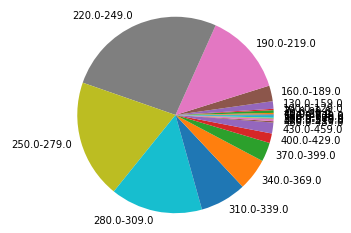

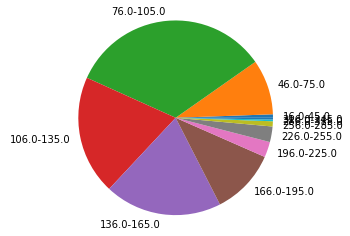

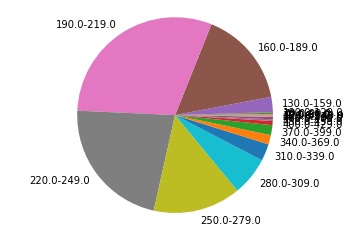

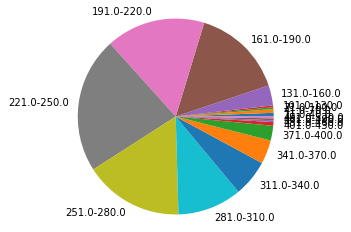

In [19]:
runtime_pie(moviedf,'Netflix')
runtime_pie(moviedf,'Hulu')
runtime_pie(moviedf,'Prime Video')
runtime_pie(moviedf,'Disney+')

In [20]:
def actors_scatter(df,platform):
    '''
  scatter plot for actors wise distribution of movies on platforms
  input param: df: input dataframe
  input param: platform: one of the platform
  '''
  imdbdf = df
  dictyr = {}
  directors = ''
  imdbdf = imdbdf.dropna()
  for i in range(len(imdbdf.index)):
      listdirectors = []
      movie  = imdbdf.iloc[i]['Title']
      valdf = (moviedf.loc[moviedf['Title'] == movie])
      if valdf.empty:
          continue
      jval = (valdf[platform].values[0])
      if jval == 1:
          directors = imdbdf.iloc[i]['Actors']
          listdirectors = directors.split(',')
          for currdir in listdirectors:
              try:
                  dictyr[currdir].append(imdbdf.iloc[i]['Title'])
              except:
                  dictyr[currdir] = []
                  dictyr[currdir].append(imdbdf.iloc[i]['Title'])
  dictyrnum = {}
  for keys,values in dictyr.items():
      dictyrnum[keys] = len(values)
  ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
  labels = []
  data = []
  labelscnt = []
  for keys,values in ordereddictyrnum.items():
      labels.append(keys)
      data.append(values)
  for i in range(len(labels)):
      labelscnt.append(labels.index(labels[i]))
  plt.scatter(labelscnt,data)
  fig = plt.gcf()
  fig.set_size_inches(20,20)
  for i, txt in enumerate(labels):
      plt.annotate(txt, (labelscnt[i],data[i]))
  plt.show()

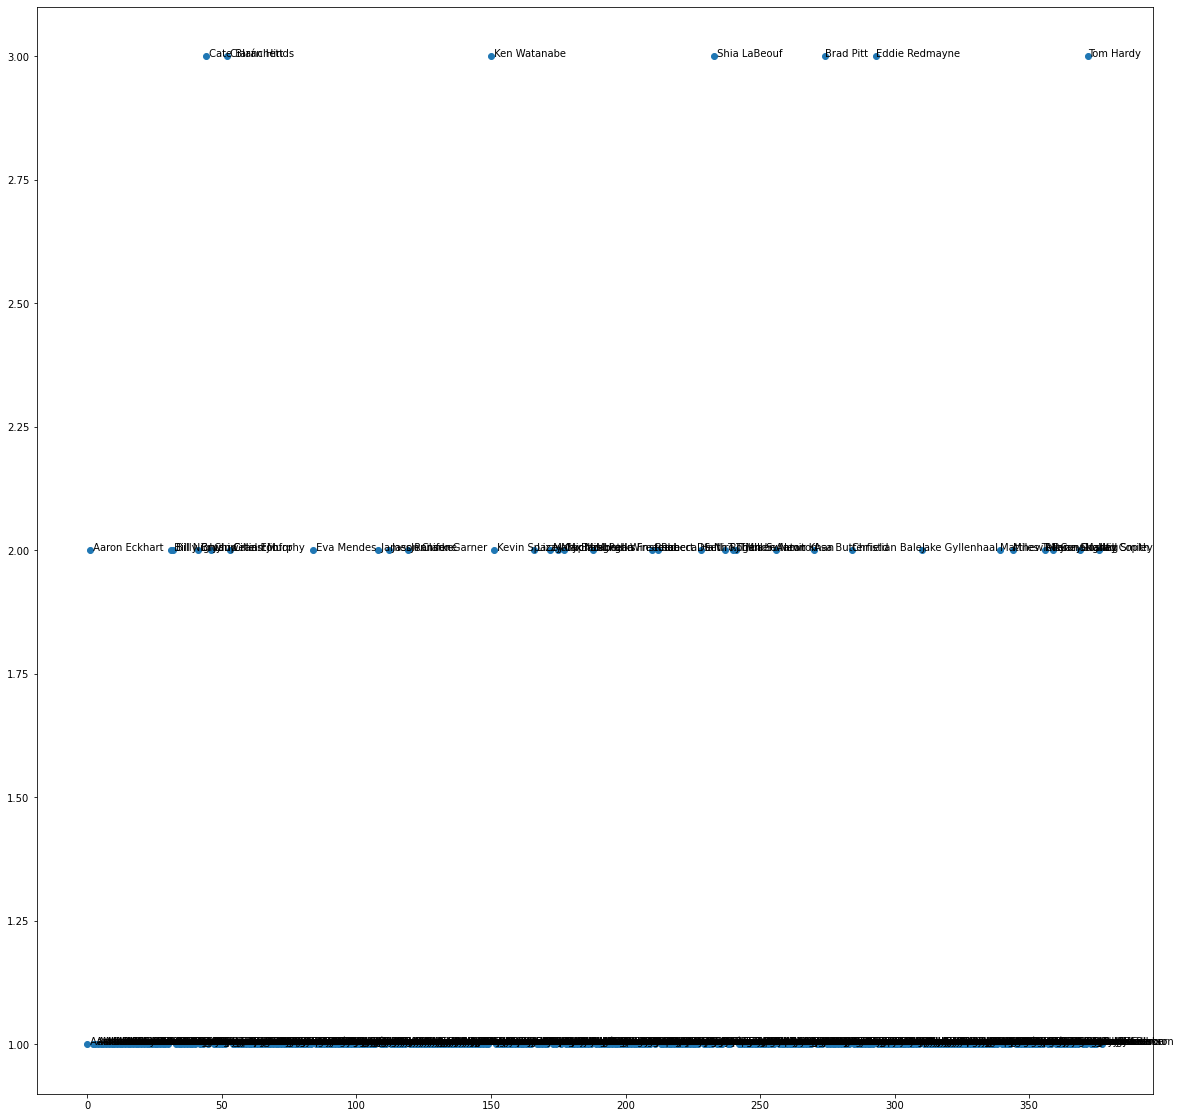

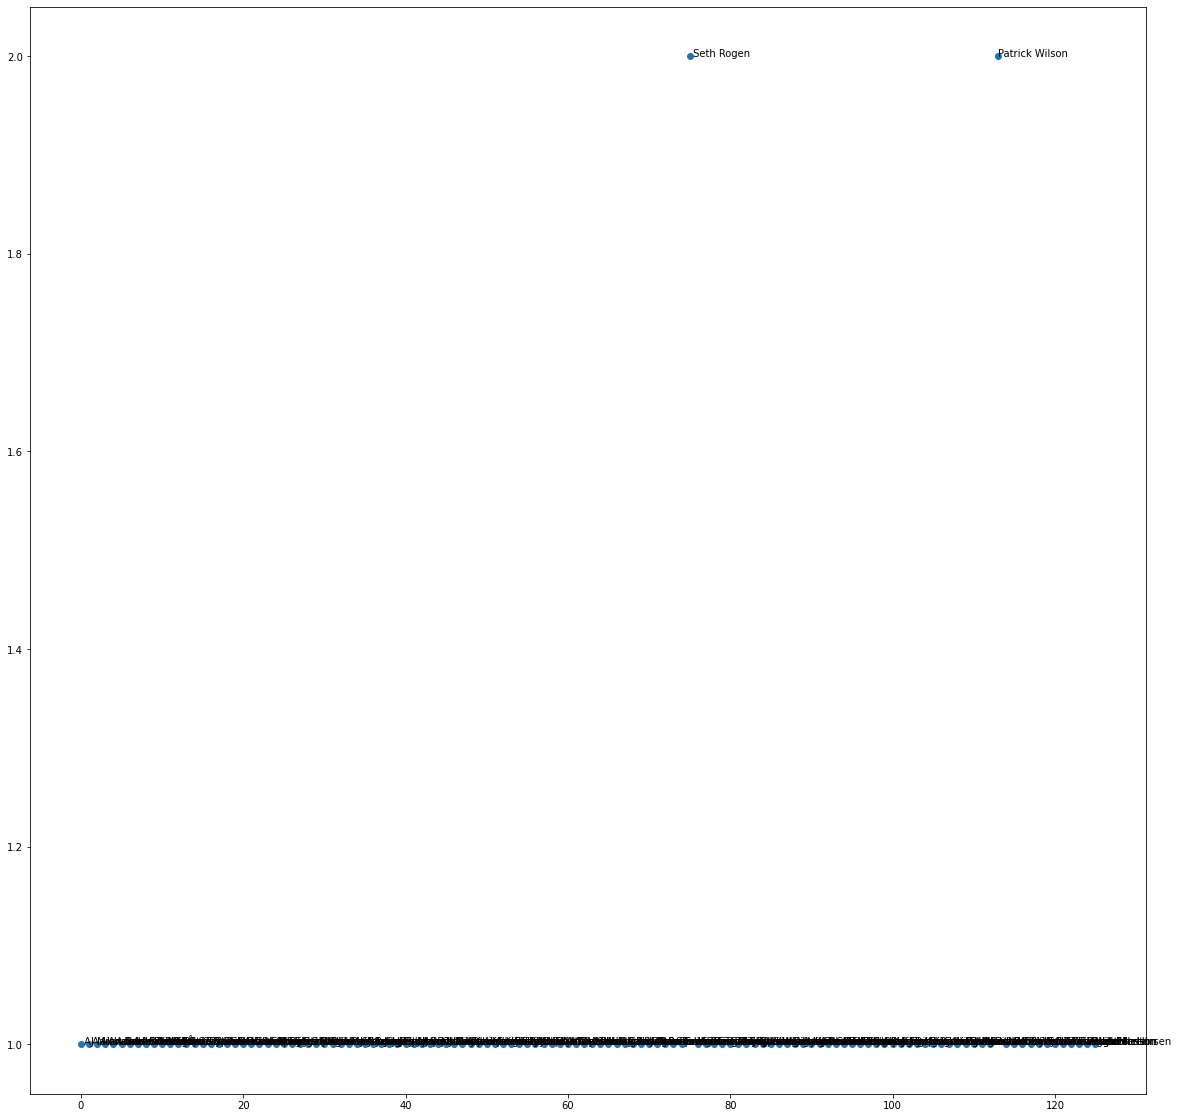

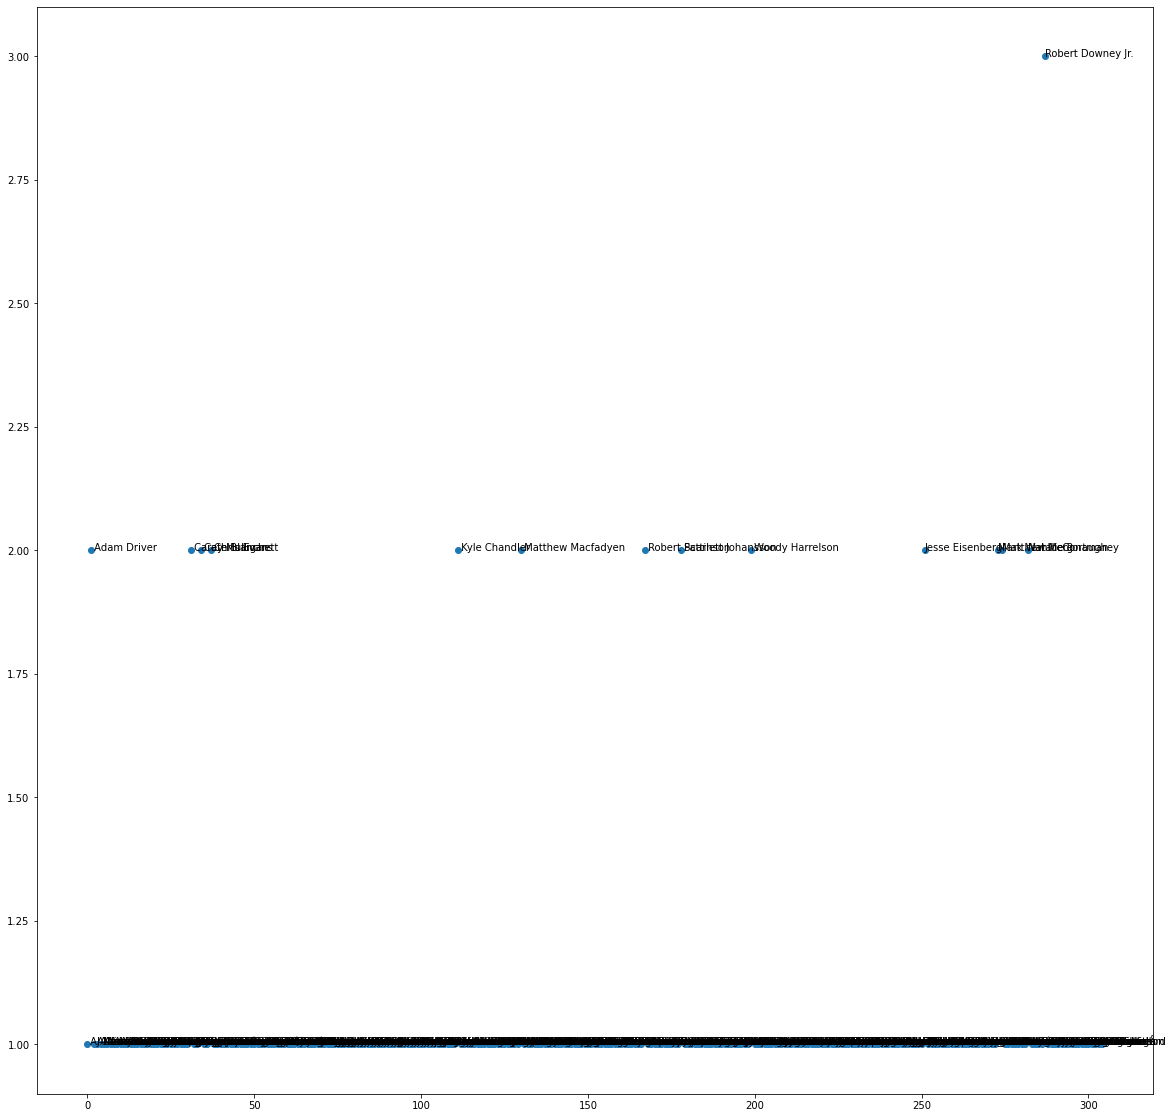

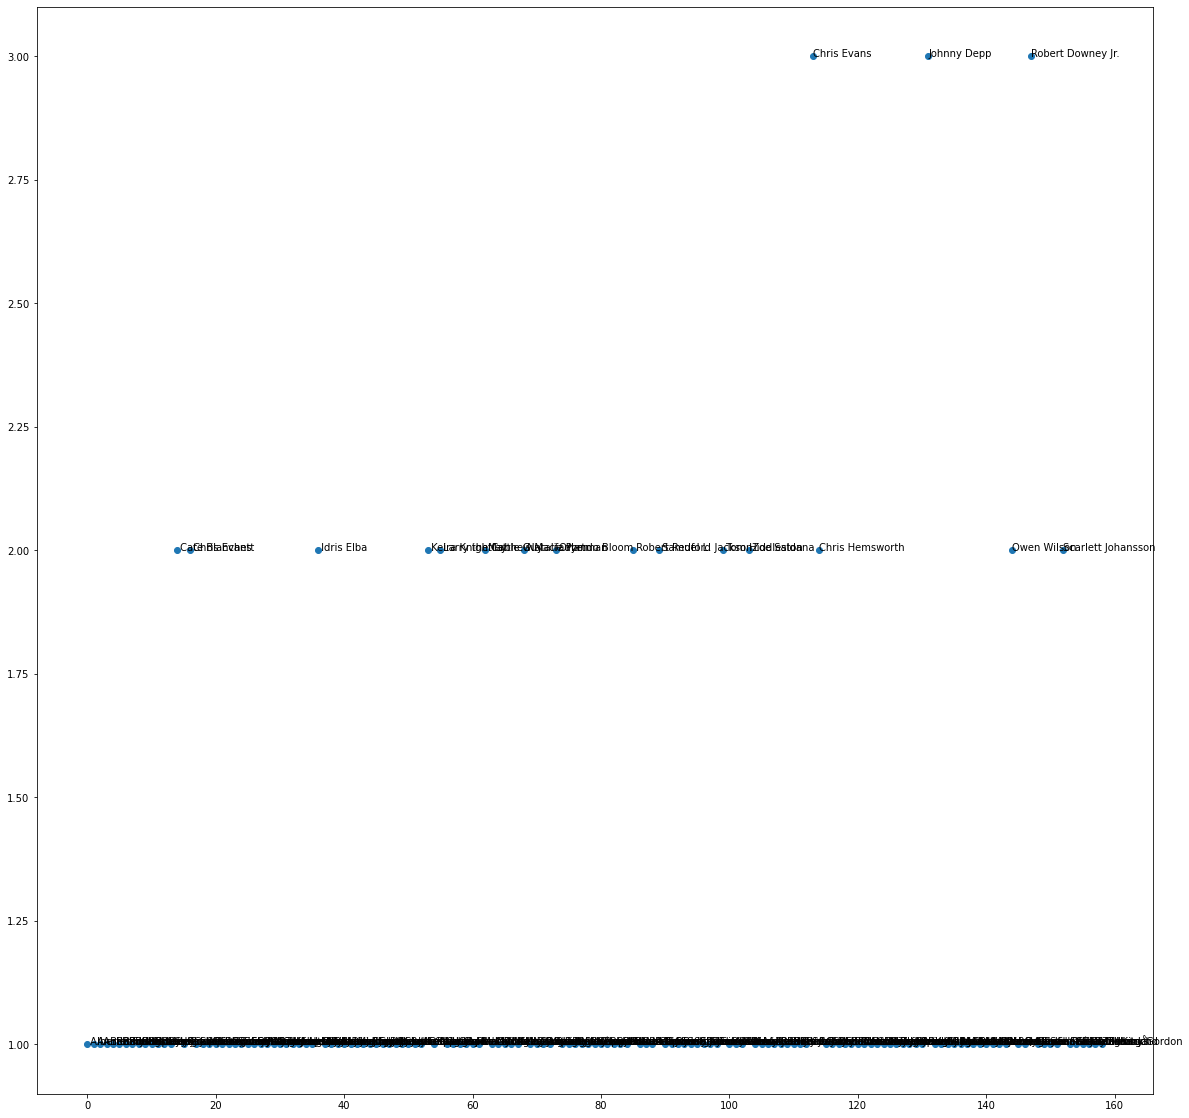

In [21]:
actors_scatter(imdbdf,'Netflix')
actors_scatter(imdbdf,'Hulu')
actors_scatter(imdbdf,'Prime Video')
actors_scatter(imdbdf,'Disney+')

In [22]:
def actors_wordcloud(df,platform):
  '''
  wordcloud for actors wise distribution of movies on platforms
  input param: df: input dataframe
  input param: platform: one of the platform
  '''
  imdbdf = df
  dictyr = {}
  directors = ''
  imdbdf = imdbdf.dropna()
  for i in range(len(imdbdf.index)):
      listdirectors = []
      movie  = imdbdf.iloc[i]['Title']
      valdf = (moviedf.loc[moviedf['Title'] == movie])
      if valdf.empty:
          continue
      jval = (valdf[platform].values[0])
      if jval == 1:
          directors = imdbdf.iloc[i]['Actors']
          listdirectors = directors.split(',')
          for currdir in listdirectors:
              try:
                  dictyr[currdir].append(imdbdf.iloc[i]['Title'])
              except:
                  dictyr[currdir] = []
                  dictyr[currdir].append(imdbdf.iloc[i]['Title'])
  dictyrnum = {}
  for keys,values in dictyr.items():
      dictyrnum[keys] = len(values)
  ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
  labels = []
  data = []
  labelscnt = []
  for keys,values in ordereddictyrnum.items():
      labels.append(keys)
      data.append(values)
  d = dict(zip(labels, data))
  wordcloud = WordCloud(collocations=False).generate_from_frequencies(d)
  plt.figure(figsize=(15,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.savefig("wordc1"+".png", bbox_inches='tight')
  plt.show()
  plt.close()

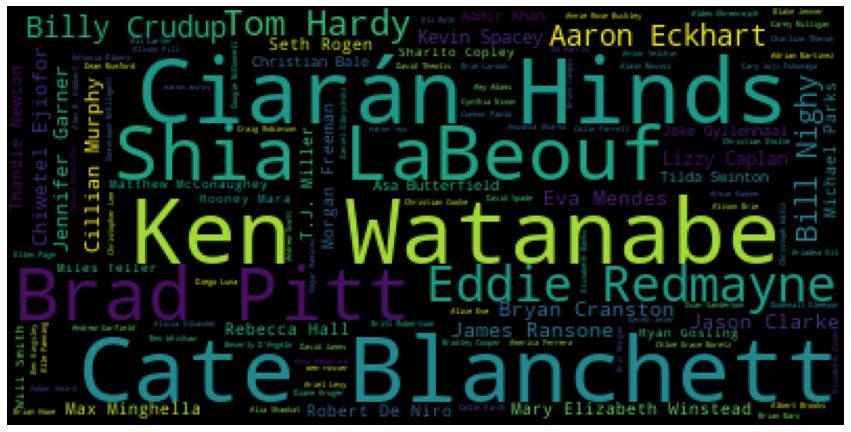

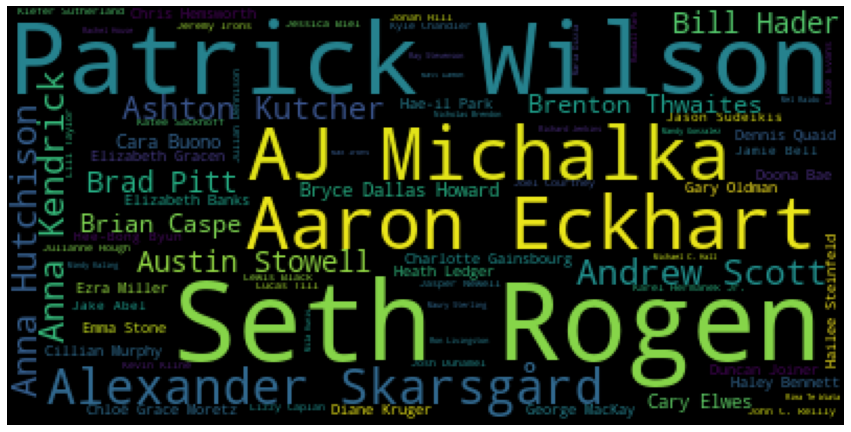

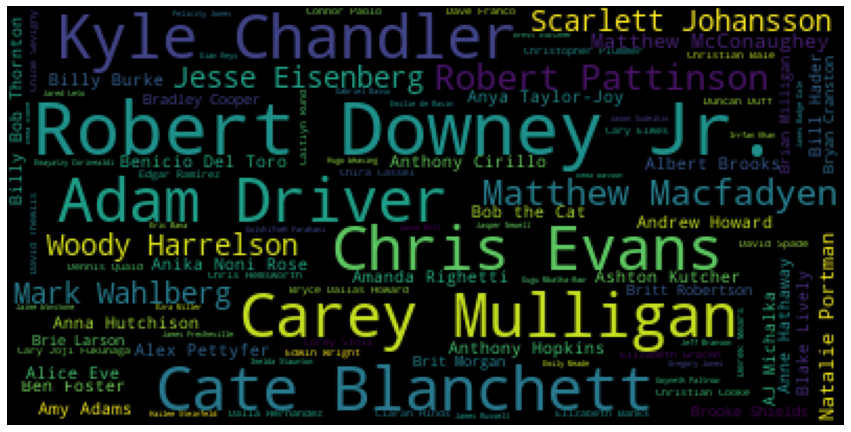

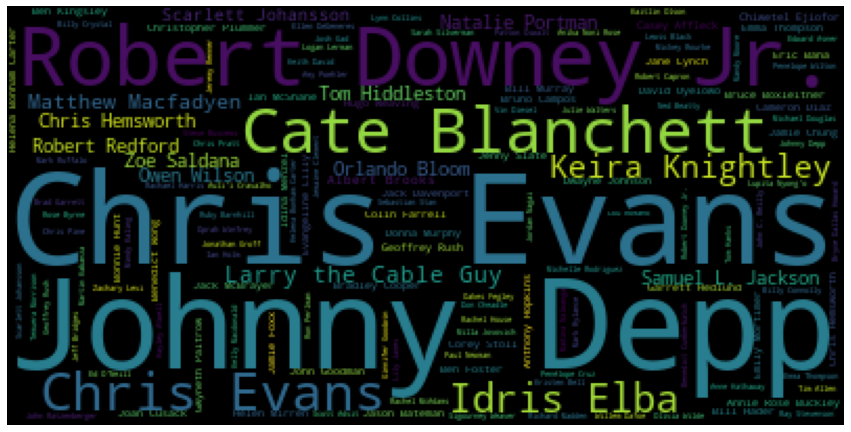

In [23]:
actors_wordcloud(imdbdf,'Netflix')
actors_wordcloud(imdbdf,'Hulu')
actors_wordcloud(imdbdf,'Prime Video')
actors_wordcloud(imdbdf,'Disney+')

In [26]:
def revenue_pie(df,platform):
  '''
  pie chart for revenue wise distribution of movies on platforms
  input param: df: input dataframe
  input param: platform: one of the platform
  '''
  imdbdf =df
  dictyr = {}
  directors = ''
  imdbdf = imdbdf.dropna()
  for i in range(len(imdbdf.index)):
      listdirectors = []
      movie  = imdbdf.iloc[i]['Title']
      valdf = (moviedf.loc[moviedf['Title'] == movie])
      if valdf.empty:
          continue
      jval = (valdf[platform].values[0])
      if jval == 1:
          directors = imdbdf.iloc[i]['Revenue (Millions)']
          currdir = directors
          try:
              dictyr[currdir].append(imdbdf.iloc[i]['Title'])
          except:
              dictyr[currdir] = []
              dictyr[currdir].append(imdbdf.iloc[i]['Title'])
  dictyrnum = {}
  for keys,values in dictyr.items():
      dictyrnum[keys] = len(values)
  ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
  labels = []
  data = []
  labelscnt = []
  for keys,values in ordereddictyrnum.items():
      labels.append(keys)
      data.append(values)
  plt.pie(data, labels=labels)
  plt.axis('equal')
  plt.show()

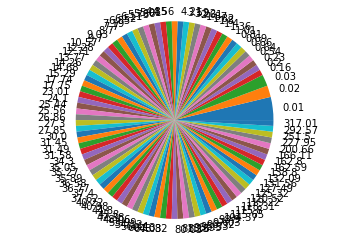

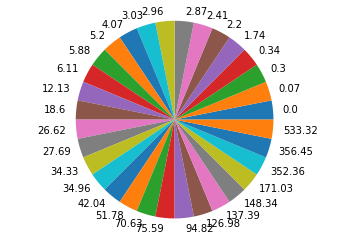

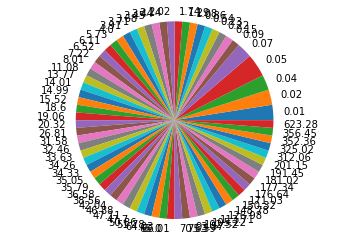

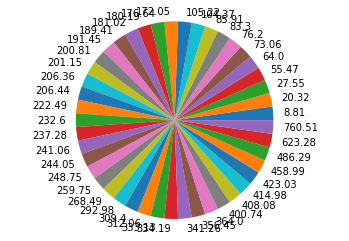

In [27]:
revenue_pie(imdbdf,'Netflix')
revenue_pie(imdbdf,'Hulu')
revenue_pie(imdbdf,'Prime Video')
revenue_pie(imdbdf,'Disney+')

In [28]:
def votes_pie(df,platform):
  '''
  pie chart for votes wise distribution of movies on platforms
  input param: df: input dataframe
  input param: platform: one of the platform
  '''
  imdbdf = df
  dictyr = {}
  directors = ''
  imdbdf = imdbdf.dropna()
  for i in range(len(imdbdf.index)):
      listdirectors = []
      movie  = imdbdf.iloc[i]['Title']
      valdf = (moviedf.loc[moviedf['Title'] == movie])
      if valdf.empty:
          continue
      jval = (valdf[platform].values[0])
      if jval == 1:
          directors = imdbdf.iloc[i]['Votes']
          currdir = directors
          try:
              dictyr[currdir].append(imdbdf.iloc[i]['Title'])
          except:
              dictyr[currdir] = []
              dictyr[currdir].append(imdbdf.iloc[i]['Title'])
  dictyrnum = {}
  for keys,values in dictyr.items():
      dictyrnum[keys] = len(values)
  ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
  labels = []
  data = []
  labelscnt = []
  for keys,values in ordereddictyrnum.items():
      labels.append(keys)
      data.append(values)
  plt.pie(data, labels=labels)
  plt.axis('equal')
  plt.show()

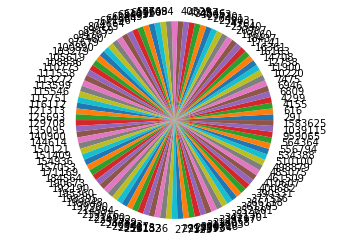

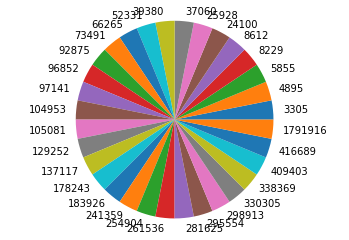

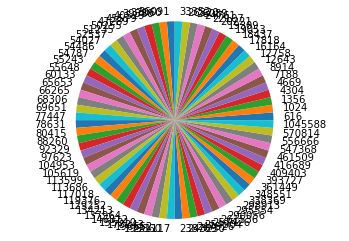

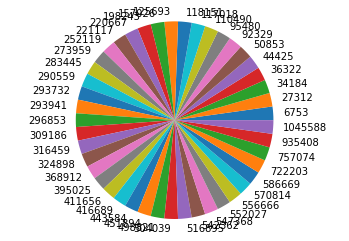

In [29]:
votes_pie(imdbdf,'Netflix')
votes_pie(imdbdf,'Hulu')
votes_pie(imdbdf,'Prime Video')
votes_pie(imdbdf,'Disney+')

In [30]:
def desc(df,platform):
  '''
  wordcloud for description of movies on platforms
  input param: df: input dataframe
  input param: platform: one of the platform
  '''
  imdbdf = df
  directors = ''
  dictyr = {}
  imdbdf = imdbdf.dropna()
  listdirectors = []
  for i in range(len(imdbdf.index)):
      movie  = imdbdf.iloc[i]['Title']
      valdf = (moviedf.loc[moviedf['Title'] == movie])
      if valdf.empty:
          continue
      jval = (valdf['Netflix'].values[0])
      if jval == 1:
          directors = imdbdf.iloc[i]['Description']
          listdirectors.append(directors.split(','))
  mergedlist = list(itertools.chain.from_iterable(listdirectors))
  unique_string=(" ").join(mergedlist)
  wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
  plt.figure(figsize=(15,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.savefig("wordc1"+".png", bbox_inches='tight')
  plt.show()
  plt.close()

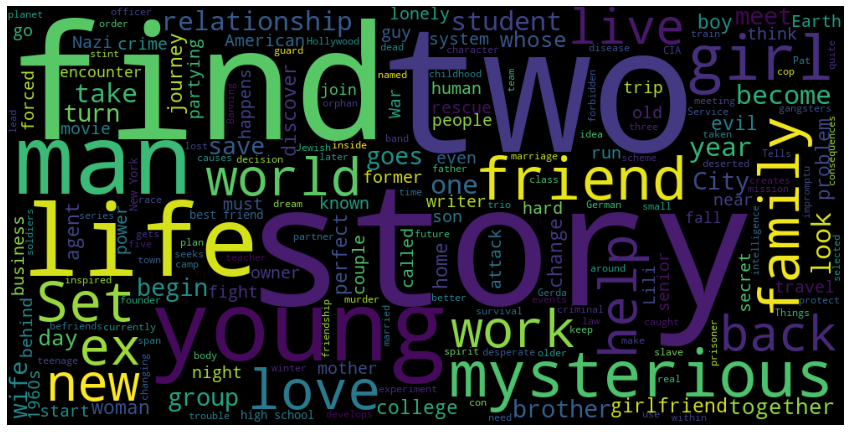

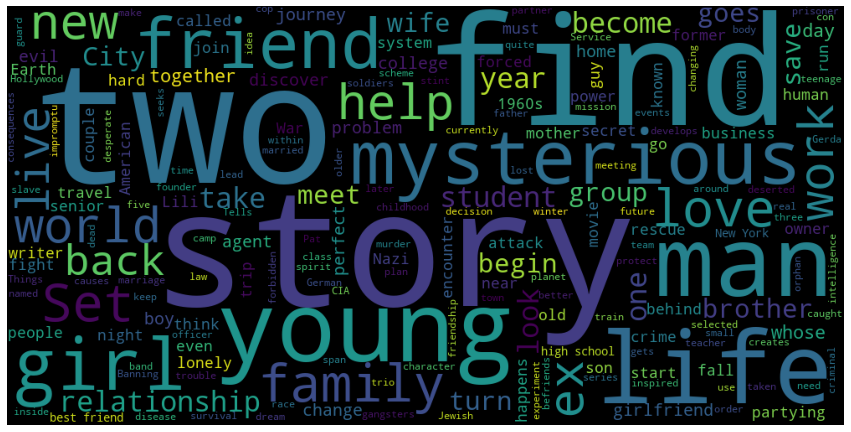

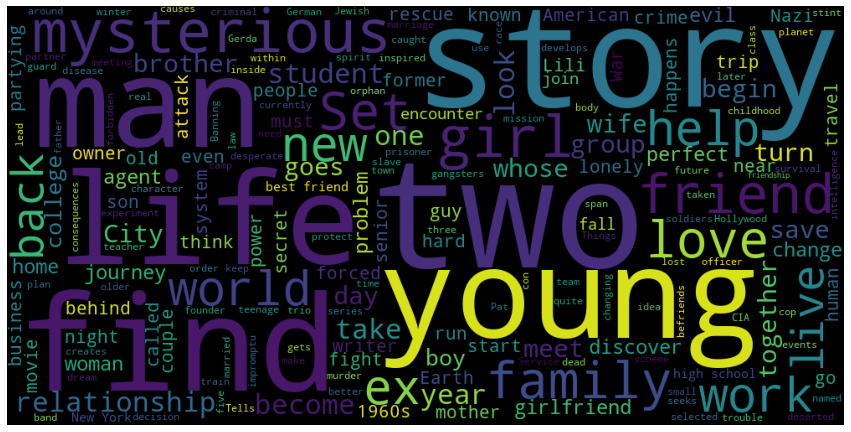

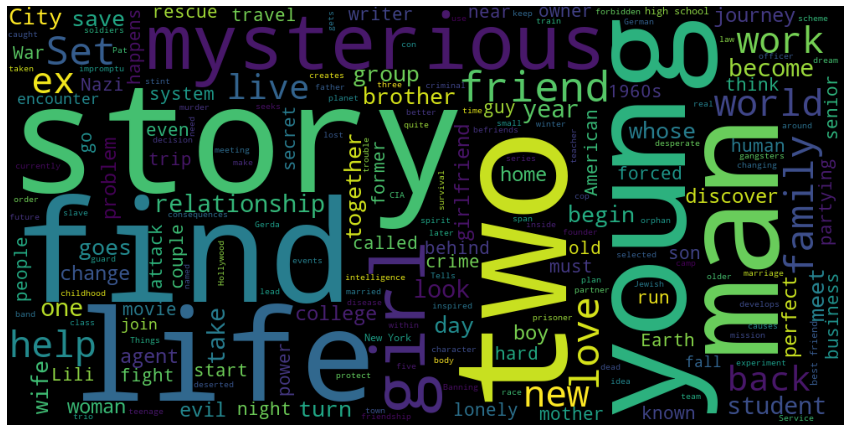

In [31]:
desc(imdbdf,'Netflix')
desc(imdbdf,'Hulu')
desc(imdbdf,'Prime Video')
desc(imdbdf,'Disney+')